# Content

In [1]:
# import lybaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# import data
path = r'/Users/lennartzeidler/Desktop/Uni/(6) Advances Analytics and Dashboard Design/liquid store sales analysis'
sales = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'prepared_map_data.pkl'))

In [4]:
sales.head()

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,Country,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6,S28865700001,11/09/2015,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38
8,S29339300091,11/30/2015,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,4,117.48,3.0,0.79
13,S28866900001,11/11/2015,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,1,17.43,1.5,0.40
18,S29134300126,11/18/2015,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",Monona,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.0,1.59
21,S29282800048,11/23/2015,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38


### hypothesis
The higher the market price, the higher is the sales price.

### Data cleaning
since I kno my hypothesis, I also know wich variables I will use. Thats why I will create a subset containing those two.  
I also cleaned the dataset in previus steps so I only need to be carefull about outliers.

In [5]:
sales_sub = sales[['State Bottle Cost', 'State Bottle Retail']]

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_5977/3020816908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_sub['State Bottle Cost'], bins=30)


<AxesSubplot:xlabel='State Bottle Cost', ylabel='Density'>

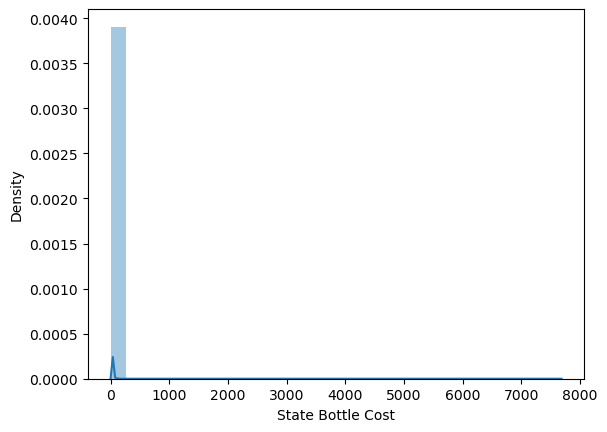

In [7]:
# check for extreme values
sns.distplot(sales_sub['State Bottle Cost'], bins=30)

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_5977/455953907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_sub['State Bottle Retail'], bins=30)


<AxesSubplot:xlabel='State Bottle Retail', ylabel='Density'>

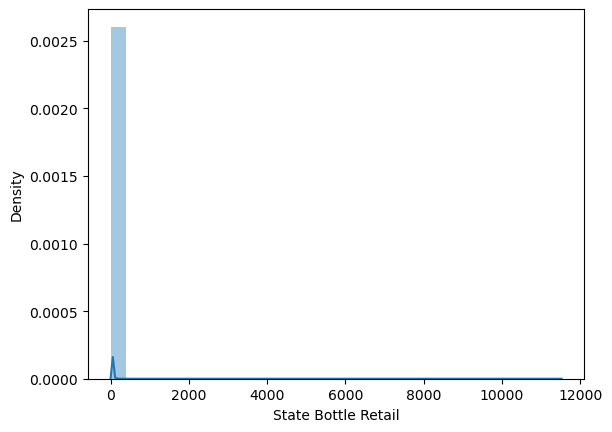

In [9]:
sns.distplot(sales_sub['State Bottle Retail'], bins=30)

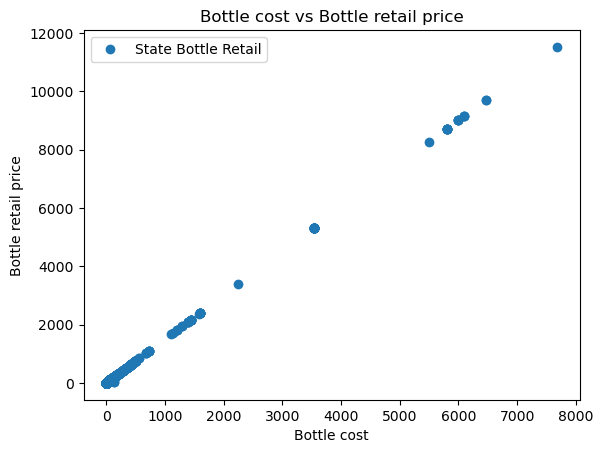

In [8]:
sales_sub.plot(x = 'State Bottle Cost', y='State Bottle Retail',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Bottle cost vs Bottle retail price')  
plt.xlabel('Bottle cost')  
plt.ylabel('Bottle retail price')  
plt.show()

Results are we have heaps of outliers and they have a huge impact. I will therefore create a subset without outliers( > Bottle cost of 2000) but will conduct the analysis with the original first to see how the preformance is.

### data prep for regression analysis

In [11]:
# Reshape the variables into NumPy arrays

X = sales_sub['State Bottle Cost'].values.reshape(-1,1)
y = sales_sub['State Bottle Retail'].values.reshape(-1,1)

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### regression analysis

In [13]:
# Create a regression object.

regression = LinearRegression()

In [14]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

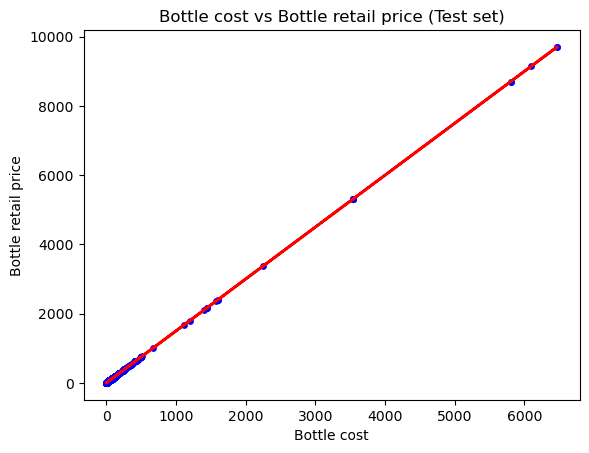

In [16]:
# Create a plot to visualize results

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =2)
plot_test.title('Bottle cost vs Bottle retail price (Test set)')
plot_test.xlabel('Bottle cost')
plot_test.ylabel('Bottle retail price')
plot_test.show()

Result looks pretty good, I would even say the line fits on point

In [18]:
# check model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse) # we want that value as low as posible
print('R2 score: ', r2) # we want that value to be as close to 1 as possible

Slope: [[1.49989434]]
Mean squared error:  0.0155686512752291
R2 score:  0.9999427369447016


Looking at this our model is really precise and usable. Since that is the case we don't really need to exclude outliers.

In [19]:
# create df comparing actual and predicted data
compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_df.head(25)

,Actual,Predicted
0,11.37,11.392888
1,18.75,18.772368
2,26.40,26.421829
3,6.08,6.098261
4,8.22,8.243110
5,10.25,10.267967
6,15.00,15.022632
7,5.91,5.933273
8,4.83,4.853349
9,13.50,13.522738


### Conclusion
The moddel performed really really good on our test data. The conslusion of that is, that we can actually use this model to predict the price of a bottle in the shops based on the price of the bottle it was imported f